## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')  #read csv file
df.head() #look at the top few rows

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
print("Number of raws in dataset:", len(df))

Number of raws in dataset: 294478


c. The number of unique users in the dataset.

In [4]:
print("Number of unique users:",len(df.user_id.unique()))

Number of unique users: 290584


d. The proportion of users converted.

In [5]:
print("Percentage of users converted:", df.converted.mean()*100) #since we have 1 or 0 values in converted column

Percentage of users converted: 11.96591935560551


e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
treatment_old = df[(df['group'] == 'treatment') & (df['landing_page'] == 'old_page')]
control_new = df[(df['group'] == 'control') & (df['landing_page'] == 'new_page')]

print("Treatment group lands incorrectly old_page:", len(treatment_old))
print("Control group lands incorrectly new_page:", len(control_new))
print("Don't line up in total:", len(treatment_old) + len(control_new))

Treatment group lands incorrectly old_page: 1965
Control group lands incorrectly new_page: 1928
Don't line up in total: 3893


f. Do any of the rows have missing values?

In [7]:
df.isnull().values.any()

False

<span style="color:red"> There is no missing values. </span> 

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = df  #use new dataframe
df_exclude = pd.concat([treatment_old, control_new])
exclude_index = df_exclude.index
df2 = df2.drop(exclude_index)

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [9]:
print("Number of unique users:", len(df2.user_id.unique()))

Number of unique users: 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [10]:
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [11]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [12]:
df2.drop(labels=1899, axis=0, inplace=True)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [13]:
print("Probability of an individual converting:", df2['converted'].mean())

Probability of an individual converting: 0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [14]:
df.groupby('group').mean()

,user_id,converted
group,,
control,788123.098035,0.120399
treatment,787825.226283,0.118920


<span style="color:red"> Given that in control group the probabilty of being converted is 0.120399</span> 

c. Given that an individual was in the `treatment` group, what is the probability they converted?

<span style="color:red"> As it is seen above, the probabilty of converted in the treatment group is 0.11892 </span> 

d. What is the probability that an individual received the new page?

In [15]:
print("Probability an individual recieved new page:", df2.landing_page.value_counts()[0]/len(df2))

Probability an individual recieved new page: 0.500061944223


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

<span style="color:red"> 
In the light of the probabilities that we found above, even if converted rate of the control group is higher than treatment's, still it the difference is too small to state a interpretation.
Furthermore, there is no information about other test conditions. Change aversion is a phenomenon that also be taken into account while making a decision.

</span>

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

<span style="color:red"> 
$H_0: p_{new} <= p_{old}$ <br>
$H_1: p_{new} > p_{old}$ 

* $H_0$: The old page has higher population conversion rate or equal
* $H_1$: The new page has higher population conversion rate 
 
 </span>

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [16]:
p_new = df2[df2['landing_page']=='new_page'].converted.mean()
print("The convert rate for p_new:", p_new)

The convert rate for p_new: 0.11880806551510564


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [17]:
p_old = df2[df2['landing_page']=='old_page'].converted.mean()
print("The convert rate for p_old:", p_old)

The convert rate for p_old: 0.1203863045004612


In [18]:
p_h0 = (p_new + p_old)/2 
print("p_new = p_old = p_H0 under null:", p_h0)

p_new = p_old = p_H0 under null: 0.11959718500778342


c. What is $n_{new}$?

In [19]:
df2['landing_page'].value_counts()

new_page    145310
old_page    145274
Name: landing_page, dtype: int64

In [20]:
n_new, n_old = df2['landing_page'].value_counts()

print("n_new:", n_new)

n_new: 145310


d. What is $n_{old}$?

In [21]:
print("n_old:", n_old)

n_old: 145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_h0, (1-p_h0)])
new_page_converted.mean()

0.11835386415250154

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_h0, (1-p_h0)])
old_page_converted.mean()

0.11922986907498934

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
new_page_converted.mean()-old_page_converted.mean()

-0.00087600492248779416

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [25]:
p_diffs = []

#for i in range(10000): 
#    new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)]).mean()
#    old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)]).mean()
#    p_diff = new_page_converted-old_page_converted
#    p_diffs.append(p_diff)

new_converted_simulation = np.random.binomial(n_new, p_h0,  10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_h0,  10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

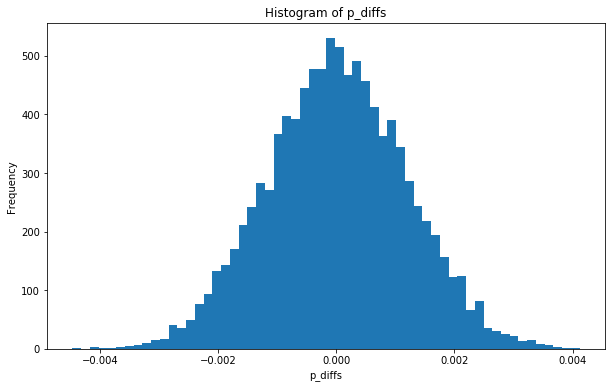

In [26]:
plt.figure(figsize=(10,6))
plt.hist(p_diffs, bins='auto')
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.title('Histogram of p_diffs');

As null hypothesis claims, mean of the distribution is zero. Since the data gathered with bootstrapping method, it is normally distributed as expected. 

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [27]:
p_diffs = np.array(p_diffs)
p_d = p_new - p_old
greater_diff = [i for i in p_diffs if i > p_d]
proportion_ = len(greater_diff)/len(p_diffs)
print("actual difference:", p_d)
print("Proportion:",proportion_)

actual difference: -0.0015782389853555567
Proportion: 0.9082


k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

<span style="color:red"> What we found in j as proportion is p value.
Since we could not reach a significant result, we fail to reject $H_0$ hypothesis. </span>

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [28]:
import statsmodels.api as sm

convert_old = len(df2[(df2['landing_page']=='old_page')&(df2['converted']==1)])
convert_new = len(df2[(df2['landing_page']=='new_page')&(df2['converted']==1)])
n_old = n_old
n_new = n_new

print("convert_old:", convert_old) 
print("convert_new:", convert_new)
print("n_old:", n_old)
print("n_new:", n_new)

C:\Users\tcsnefsiogullari\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


convert_old: 17489
convert_new: 17264
n_old: 145274
n_new: 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [29]:
z_score, p_value = sm.stats.proportions_ztest(count=[convert_new, convert_old], nobs=[n_new, n_old], alternative='larger')
print("z-score:", z_score, "p value:", p_value)

z-score: -1.31092419842 p value: 0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

<span style="color:red"> We found p value as 0.905 with one-sided z test. Test score is also lead us to same result that we found before in part ii: fail to reject $H_0$ </span>

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

<span style="color:red"> I prefer to use logistic regression in this case. </span>

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [30]:
df3 = df2
df3['intercept']=1 #define intercept as 1
df3[['control', 'treatment']] = pd.get_dummies(df3['group']) #get_dummies will help us to make zero values

In [31]:
df3.tail()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0,1,1,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0,1,1,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0,1,1,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0,1,1,0
294477,715931,2017-01-16 12:40:24.467417,treatment,new_page,0,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [32]:
logit = sm.Logit(df3['converted'],df3[['intercept','treatment']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [33]:
results = logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 11 Mar 2018   Pseudo R-squ.:               8.077e-06
Time:                        11:24:25   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
treatment     -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

<span style="color:red"> 
The p-value of the treatment (ab_page) is 0.190 and statistically insignificant.Hence, we could not say that the treatment helps us to explain conversion rate. 
<br><br> It is differ from the value we found in Part II, because we have compared the conversion rate of new and old page in part II and tried to look at if there is a significant difference between them. However, in logistic regression, we are trying to answer if treatment (ab_page) statistically significant attribute to explain the difference in the conversion rate. 

 </span>

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

<span style="color:red"> 
We may add some other factors that affects the people's choice. However adding too much factors lead us bad results, even if we have all the p-values of attiributes significant, the performance of the regression model might not be better. 
The main idea is to find minimum number of attributes that tell us the maximum information we need. 
</span>

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [34]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [35]:
### Create the necessary dummy variables
dummy_df = pd.get_dummies(data=countries_df, columns=['country'])
df4 = dummy_df.merge(df3, on='user_id')
df4.head()

,user_id,country_CA,country_UK,country_US,timestamp,group,landing_page,converted,intercept,control,treatment
0,834778,0,1,0,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0
1,928468,0,0,1,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
2,822059,0,1,0,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
3,711597,0,1,0,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0
4,710616,0,1,0,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


In [36]:
logit_2 = sm.Logit(df4['converted'], df4[['country_UK', 'country_US', 'intercept']])
result_2 = logit_2.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [37]:
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 11 Mar 2018   Pseudo R-squ.:               1.521e-05
Time:                        11:29:41   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
country_UK     0.0507      0.028      1.786      0.074      -0.005       0.106
country_US     0.0408      0.027      1.518      0.129      -0.012       0.093
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
==============================================================================
"""

<span style="color:red"> 
p-values of the countries are greater than 0.05. Only countries doesn't enough to explain the conversion rate.
</span>

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [38]:
### Fit Your Linear Model And Obtain the Results

logit_3 = sm.Logit(df4['converted'], df4[['treatment', 'country_UK', 'country_US', 'intercept']])
result_3 = logit_3.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [39]:
result_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 11 Mar 2018   Pseudo R-squ.:               2.323e-05
Time:                        11:29:47   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
treatment     -0.0149      0.011     -1.307      0.191      -0.037       0.007
country_UK     0.0506      0.028      1.784      0.074      -0.005       0.106
country_US     0.0408      0.027      1.516      0.130      -0.012       0.093
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
==============================================================================
"""

## Conclusions

<span style="color:red"> 
All the p-values of the attiributes are greater than 0.05 except intercept. According to results we obtaioned in the last regression, we fail to reject $H_0$.
<br><br> The old page performs better than new one. There is no enough evidence that we confidently reject the null hypothesis. 

</span>

<a id='conclusions'></a>


Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.